#Ejercicio de clasificación con K-means manual usando la geometría euclidanea:

Importar librerias

In [35]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Importar datos

In [36]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7dPZu3VcPsEfmQ7vrhVc38TPipvQo0Ol9rElCa9AJyEGwMV18iDB2SPg71GOeB4fFY7krDf0ake9i/pub?output=csv'
datos = pd.read_csv(url)

Pasar de csv a un array

In [37]:
X_ = datos.values
X_

array([[91., 97., 90., ...,  0.,  0.,  0.],
       [91., 66., 80., ...,  0.,  0.,  0.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  0.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

Se crea un PCA y se ajustan unos datos como principales

In [38]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
X_pca= pca.fit_transform(X_)

Generamos una funcion de distancia y empezamos paso por paso a crear el codigo para el algoritmo K-means

In [39]:
def distancia_euclideana(x, c):
  return np.sqrt(np.sum((x - c) ** 2))


k = 4
dimension = X_.shape[0]
centroids = X_[random.sample(range(dimension), k)]
clusters_manuales = np.zeros(dimension)
distancias = np.zeros((dimension, k))

tol = 1e-6
error = 100

while error > tol:
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_euclideana(X_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    centroids_prev = np.copy(centroids)

    for l in range(k):
        puntos_cluster = X_[clusters_manuales == l]

        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)
        else:
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids[l] = X_[np.random.choice(dimension)]

    error = np.mean([distancia_euclideana(centroids[l], centroids_prev[l]) for l in range(k)])
    print(error)

55.70919581361622
37.04344765996223
9.619211144178495
0.977640611285349
0.5048022410830477
0.2855628284235927
0.19388424360791676
0.14958568495305838
0.08430909930295682
0.04459625866793755
0.04407139192932724
0.042671942263857544
0.04433982182371517
0.022376597260895102
0.0186269137399105
0.011468186055817136
0.0


Se organizan los *clusters* y centroides para su mejor funcionamiento

In [40]:
clusters_manuales = clusters_manuales.astype(int)

In [41]:
centroids = np.array(centroids)
centroids = pca.transform(centroids)
centroids

array([[-57.56216626,   5.69097226,  22.18605445],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.56267467,  51.85324403, -17.22556011],
       [-18.85879473, -51.1522675 , -19.9705454 ]])

##Gráficas:

Se procede a graficar en 2d

In [46]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='BrBG_r',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'Centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

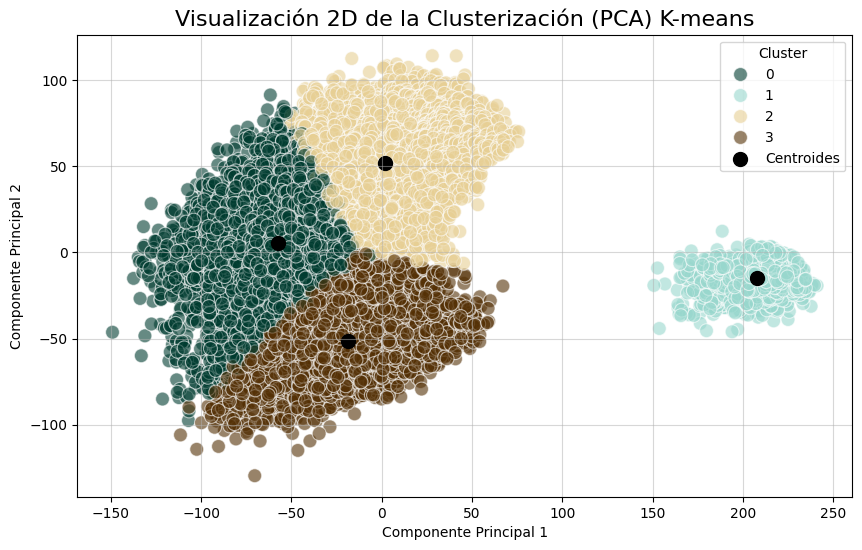

In [47]:
kmeans_2d = graficar_clusters_PCA2D(clusters_manuales, 'K-means', centroids)

Se grafica en 3D

In [44]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D(clusters, metodo):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                       c=clusters, cmap='BrBG_r',
                       alpha=0.6)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend1= ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
    ax.add_artist(legend1)
    plt.show()

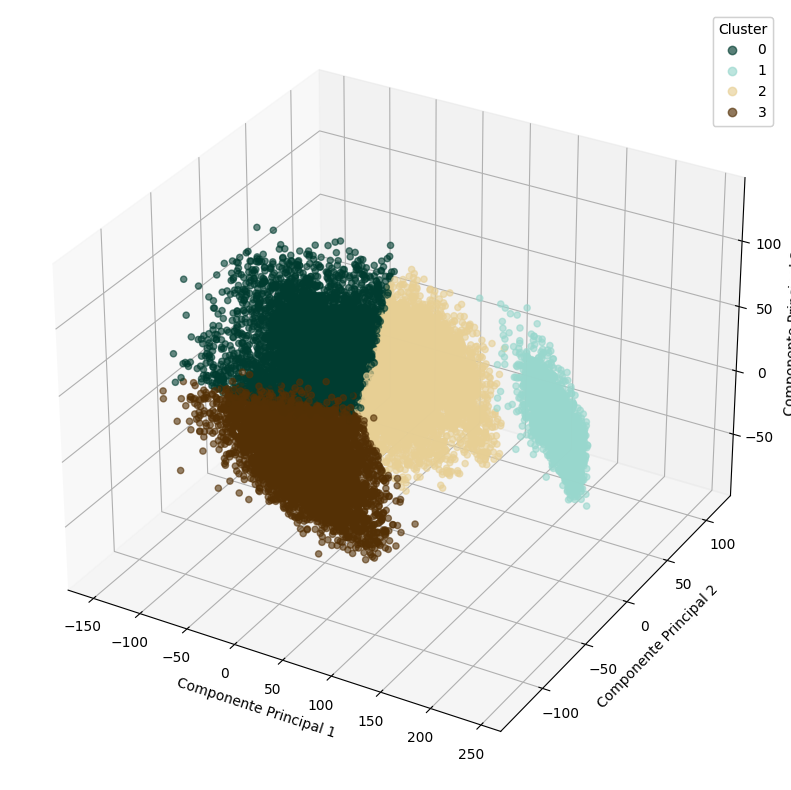

In [45]:
graficar_clusters_PCA3D(clusters_manuales, 'K-means')